# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

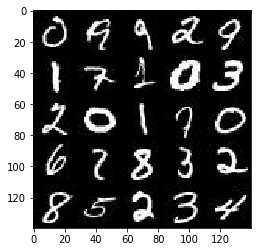

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

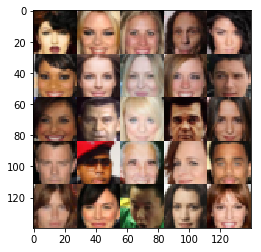

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [4]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    image = tf.placeholder(tf.float32, shape=(None,image_width, image_height, image_channels))
    Zinput = tf.placeholder(tf.float32, shape=(None, z_dim))
    learn_rate = tf.placeholder(tf.float32, shape=None)


    return image, Zinput, learn_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [5]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.2
    keep_prob = 0.75
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128

        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x2, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [37]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 7x7x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        #logits = tf.layers.batch_normalization(logits, training=is_train) # can be removed

        # 28x28x3 now
        
        out = tf.tanh(logits)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [47]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* 0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [48]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [49]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [50]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model    
    image, Zinput, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        
    d_loss, g_loss = model_loss(image, Zinput, data_shape[3])
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
        
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                #for x, y in dataset.batches(batch_size):
                steps += 1
                # TODO: Train Model
                #batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images*2
                
                # Sample random noise for G
                batch_z = np.random.uniform(low =-1, high = 1, size=(batch_size, z_dim))

                _ = sess.run(d_train_opt, feed_dict={image: batch_images, Zinput: batch_z, learn_rate: learning_rate})

                _ = sess.run(g_train_opt, feed_dict={image: batch_images, Zinput: batch_z, learn_rate: learning_rate})

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({image: batch_images, Zinput: batch_z})
                    train_loss_g = g_loss.eval({Zinput: batch_z, image: batch_images})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 10, Zinput, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.


Epoch 1/2... Discriminator Loss: 1.8615... Generator Loss: 0.3659
Epoch 1/2... Discriminator Loss: 1.5937... Generator Loss: 0.5184
Epoch 1/2... Discriminator Loss: 1.4680... Generator Loss: 0.6201
Epoch 1/2... Discriminator Loss: 1.5915... Generator Loss: 0.5457
Epoch 1/2... Discriminator Loss: 1.5375... Generator Loss: 0.5918
Epoch 1/2... Discriminator Loss: 1.4080... Generator Loss: 0.6690
Epoch 1/2... Discriminator Loss: 1.4244... Generator Loss: 0.6550
Epoch 1/2... Discriminator Loss: 1.2798... Generator Loss: 0.7660
Epoch 1/2... Discriminator Loss: 1.2053... Generator Loss: 0.8446
Epoch 1/2... Discriminator Loss: 1.2237... Generator Loss: 0.8145


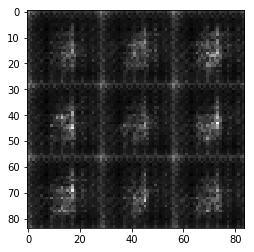

Epoch 1/2... Discriminator Loss: 1.2765... Generator Loss: 0.7649
Epoch 1/2... Discriminator Loss: 1.3070... Generator Loss: 0.7789
Epoch 1/2... Discriminator Loss: 1.3556... Generator Loss: 0.7590
Epoch 1/2... Discriminator Loss: 1.2805... Generator Loss: 0.7991
Epoch 1/2... Discriminator Loss: 1.2872... Generator Loss: 0.8196
Epoch 1/2... Discriminator Loss: 1.2334... Generator Loss: 0.8395
Epoch 1/2... Discriminator Loss: 1.3141... Generator Loss: 0.7854
Epoch 1/2... Discriminator Loss: 1.2633... Generator Loss: 0.8281
Epoch 1/2... Discriminator Loss: 1.2151... Generator Loss: 0.8748
Epoch 1/2... Discriminator Loss: 1.2803... Generator Loss: 0.8113


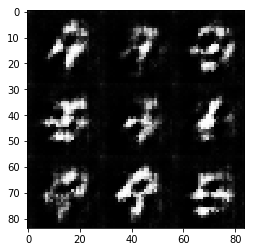

Epoch 1/2... Discriminator Loss: 1.2710... Generator Loss: 0.8287
Epoch 1/2... Discriminator Loss: 1.3430... Generator Loss: 0.7881
Epoch 1/2... Discriminator Loss: 1.3072... Generator Loss: 0.8336
Epoch 1/2... Discriminator Loss: 1.2758... Generator Loss: 0.8265
Epoch 1/2... Discriminator Loss: 1.2757... Generator Loss: 0.8391
Epoch 1/2... Discriminator Loss: 1.2433... Generator Loss: 0.8562
Epoch 1/2... Discriminator Loss: 1.2406... Generator Loss: 0.8463
Epoch 1/2... Discriminator Loss: 1.2743... Generator Loss: 0.8342
Epoch 1/2... Discriminator Loss: 1.2172... Generator Loss: 0.9114
Epoch 1/2... Discriminator Loss: 1.3000... Generator Loss: 0.8232


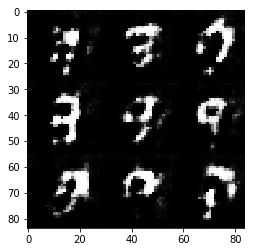

Epoch 1/2... Discriminator Loss: 1.2974... Generator Loss: 0.8427
Epoch 1/2... Discriminator Loss: 1.2669... Generator Loss: 0.8512
Epoch 1/2... Discriminator Loss: 1.2930... Generator Loss: 0.8198
Epoch 1/2... Discriminator Loss: 1.2694... Generator Loss: 0.8348
Epoch 1/2... Discriminator Loss: 1.2622... Generator Loss: 0.8258
Epoch 1/2... Discriminator Loss: 1.2370... Generator Loss: 0.8803
Epoch 1/2... Discriminator Loss: 1.2758... Generator Loss: 0.8545
Epoch 1/2... Discriminator Loss: 1.2378... Generator Loss: 0.8732
Epoch 1/2... Discriminator Loss: 1.2954... Generator Loss: 0.8168
Epoch 1/2... Discriminator Loss: 1.2223... Generator Loss: 0.8776


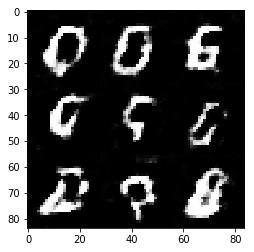

Epoch 1/2... Discriminator Loss: 1.2606... Generator Loss: 0.8291
Epoch 1/2... Discriminator Loss: 1.2362... Generator Loss: 0.8787
Epoch 1/2... Discriminator Loss: 1.2499... Generator Loss: 0.8665
Epoch 1/2... Discriminator Loss: 1.2432... Generator Loss: 0.8545
Epoch 1/2... Discriminator Loss: 1.2603... Generator Loss: 0.8529
Epoch 1/2... Discriminator Loss: 1.3103... Generator Loss: 0.8051
Epoch 1/2... Discriminator Loss: 1.2500... Generator Loss: 0.8911
Epoch 1/2... Discriminator Loss: 1.2494... Generator Loss: 0.8696
Epoch 1/2... Discriminator Loss: 1.2535... Generator Loss: 0.8634
Epoch 1/2... Discriminator Loss: 1.2314... Generator Loss: 0.8778


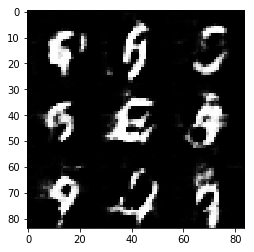

Epoch 1/2... Discriminator Loss: 1.2373... Generator Loss: 0.8950
Epoch 1/2... Discriminator Loss: 1.2402... Generator Loss: 0.8439
Epoch 1/2... Discriminator Loss: 1.2441... Generator Loss: 0.8822
Epoch 1/2... Discriminator Loss: 1.2919... Generator Loss: 0.8320
Epoch 1/2... Discriminator Loss: 1.3066... Generator Loss: 0.8368
Epoch 1/2... Discriminator Loss: 1.2333... Generator Loss: 0.8664
Epoch 1/2... Discriminator Loss: 1.2921... Generator Loss: 0.8381
Epoch 1/2... Discriminator Loss: 1.2818... Generator Loss: 0.8621
Epoch 1/2... Discriminator Loss: 1.2510... Generator Loss: 0.8700
Epoch 1/2... Discriminator Loss: 1.2518... Generator Loss: 0.8200


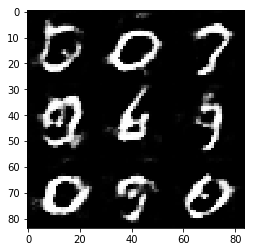

Epoch 1/2... Discriminator Loss: 1.2403... Generator Loss: 0.8916
Epoch 1/2... Discriminator Loss: 1.2558... Generator Loss: 0.8810
Epoch 1/2... Discriminator Loss: 1.2382... Generator Loss: 0.9027
Epoch 1/2... Discriminator Loss: 1.2316... Generator Loss: 0.8934
Epoch 1/2... Discriminator Loss: 1.3017... Generator Loss: 0.8498
Epoch 1/2... Discriminator Loss: 1.2395... Generator Loss: 0.8860
Epoch 1/2... Discriminator Loss: 1.1967... Generator Loss: 0.8938
Epoch 1/2... Discriminator Loss: 1.3161... Generator Loss: 0.8022
Epoch 1/2... Discriminator Loss: 1.2807... Generator Loss: 0.8568
Epoch 1/2... Discriminator Loss: 1.2620... Generator Loss: 0.8976


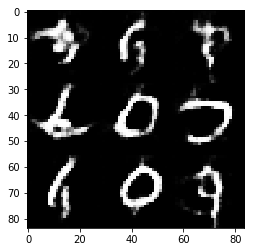

Epoch 1/2... Discriminator Loss: 1.2370... Generator Loss: 0.8983
Epoch 1/2... Discriminator Loss: 1.2838... Generator Loss: 0.8362
Epoch 1/2... Discriminator Loss: 1.2492... Generator Loss: 0.8543
Epoch 1/2... Discriminator Loss: 1.2786... Generator Loss: 0.8465
Epoch 1/2... Discriminator Loss: 1.2621... Generator Loss: 0.8578
Epoch 1/2... Discriminator Loss: 1.2977... Generator Loss: 0.8421
Epoch 1/2... Discriminator Loss: 1.2548... Generator Loss: 0.8521
Epoch 1/2... Discriminator Loss: 1.2629... Generator Loss: 0.8415
Epoch 1/2... Discriminator Loss: 1.2652... Generator Loss: 0.8648
Epoch 1/2... Discriminator Loss: 1.2699... Generator Loss: 0.8453


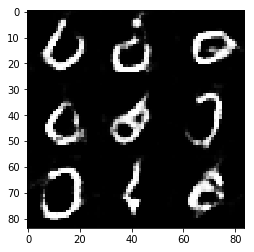

Epoch 1/2... Discriminator Loss: 1.2347... Generator Loss: 0.8555
Epoch 1/2... Discriminator Loss: 1.2477... Generator Loss: 0.8818
Epoch 1/2... Discriminator Loss: 1.2606... Generator Loss: 0.8155
Epoch 1/2... Discriminator Loss: 1.2828... Generator Loss: 0.8548
Epoch 1/2... Discriminator Loss: 1.2814... Generator Loss: 0.8534
Epoch 1/2... Discriminator Loss: 1.2437... Generator Loss: 0.9045
Epoch 1/2... Discriminator Loss: 1.2759... Generator Loss: 0.8759
Epoch 1/2... Discriminator Loss: 1.1938... Generator Loss: 0.9481
Epoch 1/2... Discriminator Loss: 1.2214... Generator Loss: 0.8679
Epoch 1/2... Discriminator Loss: 1.2777... Generator Loss: 0.8530


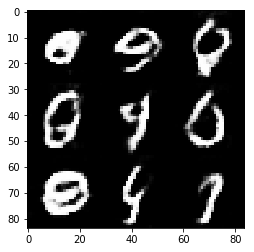

Epoch 1/2... Discriminator Loss: 1.2538... Generator Loss: 0.8486
Epoch 1/2... Discriminator Loss: 1.2411... Generator Loss: 0.8978
Epoch 1/2... Discriminator Loss: 1.2718... Generator Loss: 0.8223
Epoch 2/2... Discriminator Loss: 1.2488... Generator Loss: 0.8953
Epoch 2/2... Discriminator Loss: 1.2520... Generator Loss: 0.8807
Epoch 2/2... Discriminator Loss: 1.2471... Generator Loss: 0.8494
Epoch 2/2... Discriminator Loss: 1.2897... Generator Loss: 0.8967
Epoch 2/2... Discriminator Loss: 1.2691... Generator Loss: 0.8420
Epoch 2/2... Discriminator Loss: 1.2292... Generator Loss: 0.9049
Epoch 2/2... Discriminator Loss: 1.2424... Generator Loss: 0.8862


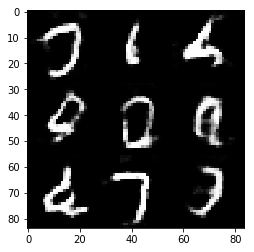

Epoch 2/2... Discriminator Loss: 1.2164... Generator Loss: 0.9115
Epoch 2/2... Discriminator Loss: 1.2235... Generator Loss: 0.9038
Epoch 2/2... Discriminator Loss: 1.2476... Generator Loss: 0.8458
Epoch 2/2... Discriminator Loss: 1.2238... Generator Loss: 0.9077
Epoch 2/2... Discriminator Loss: 1.1957... Generator Loss: 0.8588
Epoch 2/2... Discriminator Loss: 1.2737... Generator Loss: 0.8176
Epoch 2/2... Discriminator Loss: 1.2372... Generator Loss: 0.9003
Epoch 2/2... Discriminator Loss: 1.2087... Generator Loss: 0.9091
Epoch 2/2... Discriminator Loss: 1.1863... Generator Loss: 0.9022
Epoch 2/2... Discriminator Loss: 1.1927... Generator Loss: 0.8727


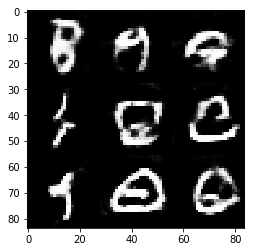

Epoch 2/2... Discriminator Loss: 1.2471... Generator Loss: 0.9281
Epoch 2/2... Discriminator Loss: 1.2307... Generator Loss: 0.8633
Epoch 2/2... Discriminator Loss: 1.2059... Generator Loss: 0.9099
Epoch 2/2... Discriminator Loss: 1.1880... Generator Loss: 0.9494
Epoch 2/2... Discriminator Loss: 1.2528... Generator Loss: 0.9717
Epoch 2/2... Discriminator Loss: 1.2308... Generator Loss: 0.9094
Epoch 2/2... Discriminator Loss: 1.2120... Generator Loss: 0.9694
Epoch 2/2... Discriminator Loss: 1.2395... Generator Loss: 0.8485
Epoch 2/2... Discriminator Loss: 1.2381... Generator Loss: 0.8986
Epoch 2/2... Discriminator Loss: 1.2480... Generator Loss: 0.8308


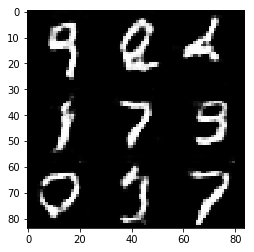

Epoch 2/2... Discriminator Loss: 1.2019... Generator Loss: 0.9017
Epoch 2/2... Discriminator Loss: 1.1840... Generator Loss: 0.9045
Epoch 2/2... Discriminator Loss: 1.2521... Generator Loss: 0.8984
Epoch 2/2... Discriminator Loss: 1.2179... Generator Loss: 0.8628
Epoch 2/2... Discriminator Loss: 1.2528... Generator Loss: 0.9369
Epoch 2/2... Discriminator Loss: 1.2266... Generator Loss: 0.9604
Epoch 2/2... Discriminator Loss: 1.2545... Generator Loss: 0.8001
Epoch 2/2... Discriminator Loss: 1.2225... Generator Loss: 0.9146
Epoch 2/2... Discriminator Loss: 1.1574... Generator Loss: 0.9529
Epoch 2/2... Discriminator Loss: 1.2017... Generator Loss: 0.9216


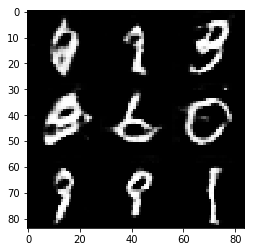

Epoch 2/2... Discriminator Loss: 1.2063... Generator Loss: 1.0229
Epoch 2/2... Discriminator Loss: 1.2452... Generator Loss: 0.8616
Epoch 2/2... Discriminator Loss: 1.2070... Generator Loss: 0.8910
Epoch 2/2... Discriminator Loss: 1.2780... Generator Loss: 0.9477
Epoch 2/2... Discriminator Loss: 1.2244... Generator Loss: 0.8350
Epoch 2/2... Discriminator Loss: 1.1995... Generator Loss: 1.0681
Epoch 2/2... Discriminator Loss: 1.2012... Generator Loss: 0.9496
Epoch 2/2... Discriminator Loss: 1.2064... Generator Loss: 0.8843
Epoch 2/2... Discriminator Loss: 1.1712... Generator Loss: 0.9729
Epoch 2/2... Discriminator Loss: 1.1817... Generator Loss: 0.9099


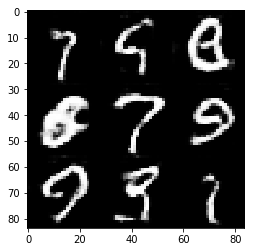

Epoch 2/2... Discriminator Loss: 1.2778... Generator Loss: 0.9749
Epoch 2/2... Discriminator Loss: 1.2321... Generator Loss: 0.8757
Epoch 2/2... Discriminator Loss: 1.2051... Generator Loss: 0.9556
Epoch 2/2... Discriminator Loss: 1.2167... Generator Loss: 0.8466
Epoch 2/2... Discriminator Loss: 1.3361... Generator Loss: 0.9842
Epoch 2/2... Discriminator Loss: 1.2475... Generator Loss: 0.9505
Epoch 2/2... Discriminator Loss: 1.1718... Generator Loss: 0.8919
Epoch 2/2... Discriminator Loss: 1.2638... Generator Loss: 1.0627
Epoch 2/2... Discriminator Loss: 1.2461... Generator Loss: 0.7446
Epoch 2/2... Discriminator Loss: 1.2324... Generator Loss: 0.8662


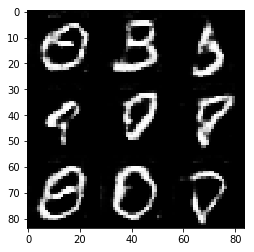

Epoch 2/2... Discriminator Loss: 1.2075... Generator Loss: 0.8668
Epoch 2/2... Discriminator Loss: 1.3104... Generator Loss: 0.6539
Epoch 2/2... Discriminator Loss: 1.2072... Generator Loss: 0.9610
Epoch 2/2... Discriminator Loss: 1.2078... Generator Loss: 0.9202
Epoch 2/2... Discriminator Loss: 1.1774... Generator Loss: 0.8910
Epoch 2/2... Discriminator Loss: 1.1860... Generator Loss: 0.9522
Epoch 2/2... Discriminator Loss: 1.1625... Generator Loss: 1.1015
Epoch 2/2... Discriminator Loss: 1.1957... Generator Loss: 0.8863
Epoch 2/2... Discriminator Loss: 1.1961... Generator Loss: 0.8841
Epoch 2/2... Discriminator Loss: 1.1757... Generator Loss: 0.9403


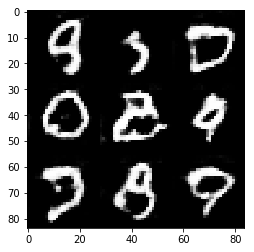

Epoch 2/2... Discriminator Loss: 1.1828... Generator Loss: 0.8433
Epoch 2/2... Discriminator Loss: 1.2085... Generator Loss: 0.8948
Epoch 2/2... Discriminator Loss: 1.2102... Generator Loss: 1.0715
Epoch 2/2... Discriminator Loss: 1.2257... Generator Loss: 0.7555
Epoch 2/2... Discriminator Loss: 1.1751... Generator Loss: 0.9563
Epoch 2/2... Discriminator Loss: 1.1773... Generator Loss: 0.8563
Epoch 2/2... Discriminator Loss: 1.1983... Generator Loss: 0.9940
Epoch 2/2... Discriminator Loss: 1.1658... Generator Loss: 1.1489
Epoch 2/2... Discriminator Loss: 1.1764... Generator Loss: 0.8589
Epoch 2/2... Discriminator Loss: 1.2166... Generator Loss: 0.7489


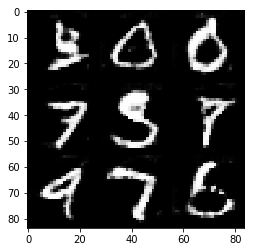

Epoch 2/2... Discriminator Loss: 1.2075... Generator Loss: 0.8942
Epoch 2/2... Discriminator Loss: 1.2036... Generator Loss: 0.7923
Epoch 2/2... Discriminator Loss: 1.1860... Generator Loss: 0.9655
Epoch 2/2... Discriminator Loss: 1.2128... Generator Loss: 0.9327
Epoch 2/2... Discriminator Loss: 1.2277... Generator Loss: 0.8929
Epoch 2/2... Discriminator Loss: 1.2222... Generator Loss: 0.8960
Epoch 2/2... Discriminator Loss: 1.1732... Generator Loss: 0.8949
Epoch 2/2... Discriminator Loss: 1.1962... Generator Loss: 0.8135
Epoch 2/2... Discriminator Loss: 1.1422... Generator Loss: 1.0439
Epoch 2/2... Discriminator Loss: 1.1937... Generator Loss: 0.8852


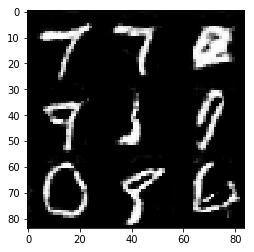

Epoch 2/2... Discriminator Loss: 1.1538... Generator Loss: 0.9055
Epoch 2/2... Discriminator Loss: 1.1811... Generator Loss: 0.8558
Epoch 2/2... Discriminator Loss: 1.1708... Generator Loss: 0.9614
Epoch 2/2... Discriminator Loss: 1.1864... Generator Loss: 0.8869
Epoch 2/2... Discriminator Loss: 1.2583... Generator Loss: 1.0338
Epoch 2/2... Discriminator Loss: 1.1462... Generator Loss: 1.0841
Epoch 2/2... Discriminator Loss: 1.1919... Generator Loss: 0.8467


In [52]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

#print(mnist_dataset.shape)
#print(mnist_dataset.image_mode)

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
print()
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.2467... Generator Loss: 0.2567
Epoch 1/1... Discriminator Loss: 1.9045... Generator Loss: 0.3726
Epoch 1/1... Discriminator Loss: 1.6647... Generator Loss: 0.4905
Epoch 1/1... Discriminator Loss: 1.4995... Generator Loss: 0.6139
Epoch 1/1... Discriminator Loss: 1.4678... Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.3042... Generator Loss: 0.8103
Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.8448
Epoch 1/1... Discriminator Loss: 1.1856... Generator Loss: 0.9175
Epoch 1/1... Discriminator Loss: 1.2316... Generator Loss: 0.9029
Epoch 1/1... Discriminator Loss: 1.1738... Generator Loss: 0.9303


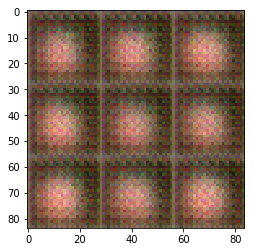

Epoch 1/1... Discriminator Loss: 1.1006... Generator Loss: 1.0270
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 0.9751
Epoch 1/1... Discriminator Loss: 1.0224... Generator Loss: 1.0693
Epoch 1/1... Discriminator Loss: 0.9147... Generator Loss: 1.2026
Epoch 1/1... Discriminator Loss: 0.7747... Generator Loss: 1.6173
Epoch 1/1... Discriminator Loss: 0.7891... Generator Loss: 1.4147
Epoch 1/1... Discriminator Loss: 0.7409... Generator Loss: 1.5618
Epoch 1/1... Discriminator Loss: 0.6999... Generator Loss: 1.9598
Epoch 1/1... Discriminator Loss: 0.8204... Generator Loss: 1.1937
Epoch 1/1... Discriminator Loss: 0.6185... Generator Loss: 2.0412


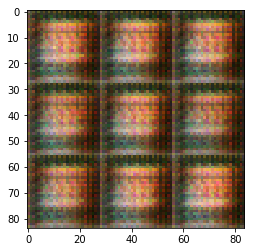

Epoch 1/1... Discriminator Loss: 0.6534... Generator Loss: 1.7618
Epoch 1/1... Discriminator Loss: 0.5574... Generator Loss: 2.5640
Epoch 1/1... Discriminator Loss: 0.5438... Generator Loss: 2.0759
Epoch 1/1... Discriminator Loss: 0.5409... Generator Loss: 1.9784
Epoch 1/1... Discriminator Loss: 0.6513... Generator Loss: 1.6348
Epoch 1/1... Discriminator Loss: 0.8475... Generator Loss: 1.0339
Epoch 1/1... Discriminator Loss: 0.5008... Generator Loss: 2.5878
Epoch 1/1... Discriminator Loss: 0.4867... Generator Loss: 2.7123
Epoch 1/1... Discriminator Loss: 0.7060... Generator Loss: 1.2732
Epoch 1/1... Discriminator Loss: 0.6541... Generator Loss: 1.4212


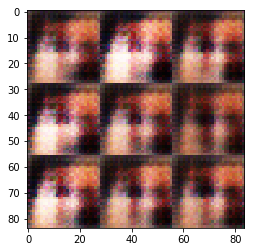

Epoch 1/1... Discriminator Loss: 0.5164... Generator Loss: 2.5431
Epoch 1/1... Discriminator Loss: 0.4304... Generator Loss: 3.2180
Epoch 1/1... Discriminator Loss: 0.4685... Generator Loss: 3.6272
Epoch 1/1... Discriminator Loss: 0.6040... Generator Loss: 1.6920
Epoch 1/1... Discriminator Loss: 0.6757... Generator Loss: 1.5929
Epoch 1/1... Discriminator Loss: 0.5763... Generator Loss: 2.8545
Epoch 1/1... Discriminator Loss: 0.5551... Generator Loss: 2.0113
Epoch 1/1... Discriminator Loss: 0.7572... Generator Loss: 1.2229
Epoch 1/1... Discriminator Loss: 0.6582... Generator Loss: 1.6966
Epoch 1/1... Discriminator Loss: 0.5967... Generator Loss: 1.8683


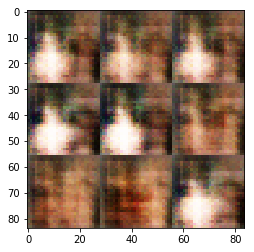

Epoch 1/1... Discriminator Loss: 0.6628... Generator Loss: 1.7199
Epoch 1/1... Discriminator Loss: 0.6628... Generator Loss: 2.1978
Epoch 1/1... Discriminator Loss: 0.6327... Generator Loss: 1.6515
Epoch 1/1... Discriminator Loss: 0.7018... Generator Loss: 1.7784
Epoch 1/1... Discriminator Loss: 0.6552... Generator Loss: 1.5987
Epoch 1/1... Discriminator Loss: 0.6809... Generator Loss: 1.5314
Epoch 1/1... Discriminator Loss: 0.5754... Generator Loss: 2.1544
Epoch 1/1... Discriminator Loss: 0.6728... Generator Loss: 2.3742
Epoch 1/1... Discriminator Loss: 0.5098... Generator Loss: 2.3594
Epoch 1/1... Discriminator Loss: 0.6569... Generator Loss: 1.8439


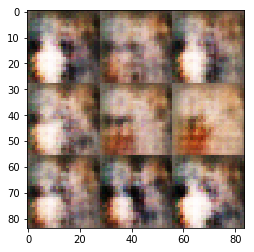

Epoch 1/1... Discriminator Loss: 0.6200... Generator Loss: 2.0523
Epoch 1/1... Discriminator Loss: 0.5706... Generator Loss: 2.2325
Epoch 1/1... Discriminator Loss: 0.6835... Generator Loss: 1.4709
Epoch 1/1... Discriminator Loss: 0.6805... Generator Loss: 1.4490
Epoch 1/1... Discriminator Loss: 0.6888... Generator Loss: 1.5242
Epoch 1/1... Discriminator Loss: 0.6448... Generator Loss: 1.7551
Epoch 1/1... Discriminator Loss: 0.7297... Generator Loss: 1.5873
Epoch 1/1... Discriminator Loss: 0.6005... Generator Loss: 1.9586
Epoch 1/1... Discriminator Loss: 0.6569... Generator Loss: 1.6986
Epoch 1/1... Discriminator Loss: 0.7159... Generator Loss: 1.6978


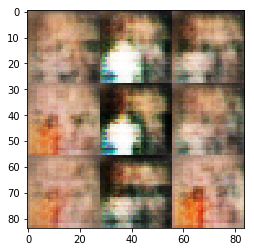

Epoch 1/1... Discriminator Loss: 0.7260... Generator Loss: 1.6248
Epoch 1/1... Discriminator Loss: 0.5942... Generator Loss: 2.1899
Epoch 1/1... Discriminator Loss: 0.7888... Generator Loss: 1.2832
Epoch 1/1... Discriminator Loss: 0.6698... Generator Loss: 1.9406
Epoch 1/1... Discriminator Loss: 0.7712... Generator Loss: 1.3653
Epoch 1/1... Discriminator Loss: 0.6035... Generator Loss: 2.2532
Epoch 1/1... Discriminator Loss: 0.6176... Generator Loss: 2.1756
Epoch 1/1... Discriminator Loss: 0.7005... Generator Loss: 2.1513
Epoch 1/1... Discriminator Loss: 0.7522... Generator Loss: 1.3145
Epoch 1/1... Discriminator Loss: 0.7769... Generator Loss: 1.2918


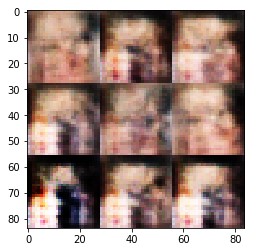

Epoch 1/1... Discriminator Loss: 0.7269... Generator Loss: 2.0628
Epoch 1/1... Discriminator Loss: 0.6202... Generator Loss: 2.0171
Epoch 1/1... Discriminator Loss: 0.7312... Generator Loss: 1.7172
Epoch 1/1... Discriminator Loss: 0.7182... Generator Loss: 1.6414
Epoch 1/1... Discriminator Loss: 0.7758... Generator Loss: 1.8963
Epoch 1/1... Discriminator Loss: 0.7100... Generator Loss: 1.7906
Epoch 1/1... Discriminator Loss: 0.6916... Generator Loss: 1.8410
Epoch 1/1... Discriminator Loss: 0.6341... Generator Loss: 2.1727
Epoch 1/1... Discriminator Loss: 0.7337... Generator Loss: 1.5784
Epoch 1/1... Discriminator Loss: 0.7452... Generator Loss: 1.6607


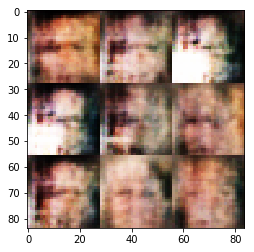

Epoch 1/1... Discriminator Loss: 0.9818... Generator Loss: 1.4863
Epoch 1/1... Discriminator Loss: 0.7602... Generator Loss: 1.8785
Epoch 1/1... Discriminator Loss: 0.8030... Generator Loss: 1.2957
Epoch 1/1... Discriminator Loss: 0.7622... Generator Loss: 1.6754
Epoch 1/1... Discriminator Loss: 0.7040... Generator Loss: 1.8468
Epoch 1/1... Discriminator Loss: 0.8774... Generator Loss: 1.5042
Epoch 1/1... Discriminator Loss: 0.7766... Generator Loss: 1.3655
Epoch 1/1... Discriminator Loss: 0.8253... Generator Loss: 1.3728
Epoch 1/1... Discriminator Loss: 0.7796... Generator Loss: 1.7107
Epoch 1/1... Discriminator Loss: 0.7213... Generator Loss: 1.7288


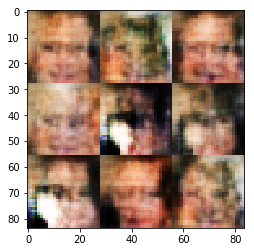

Epoch 1/1... Discriminator Loss: 0.7926... Generator Loss: 1.6958
Epoch 1/1... Discriminator Loss: 0.7820... Generator Loss: 1.5097
Epoch 1/1... Discriminator Loss: 0.7490... Generator Loss: 1.4247
Epoch 1/1... Discriminator Loss: 0.8019... Generator Loss: 1.8628
Epoch 1/1... Discriminator Loss: 0.5568... Generator Loss: 2.4336
Epoch 1/1... Discriminator Loss: 0.7937... Generator Loss: 1.5500
Epoch 1/1... Discriminator Loss: 0.7957... Generator Loss: 1.4066
Epoch 1/1... Discriminator Loss: 0.9466... Generator Loss: 1.3162
Epoch 1/1... Discriminator Loss: 0.7941... Generator Loss: 1.7540
Epoch 1/1... Discriminator Loss: 0.6807... Generator Loss: 2.2670


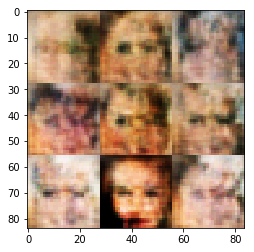

Epoch 1/1... Discriminator Loss: 0.8473... Generator Loss: 1.4372
Epoch 1/1... Discriminator Loss: 0.7627... Generator Loss: 1.4855
Epoch 1/1... Discriminator Loss: 0.8251... Generator Loss: 1.3912
Epoch 1/1... Discriminator Loss: 0.7684... Generator Loss: 1.6133
Epoch 1/1... Discriminator Loss: 0.6170... Generator Loss: 2.3226
Epoch 1/1... Discriminator Loss: 0.5624... Generator Loss: 2.6208
Epoch 1/1... Discriminator Loss: 1.0418... Generator Loss: 1.7258
Epoch 1/1... Discriminator Loss: 0.8224... Generator Loss: 1.5820
Epoch 1/1... Discriminator Loss: 0.9978... Generator Loss: 0.9500
Epoch 1/1... Discriminator Loss: 0.7458... Generator Loss: 1.6112


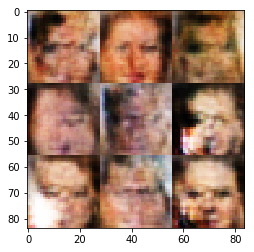

Epoch 1/1... Discriminator Loss: 0.8584... Generator Loss: 1.4681
Epoch 1/1... Discriminator Loss: 0.7562... Generator Loss: 1.7081
Epoch 1/1... Discriminator Loss: 0.8495... Generator Loss: 1.2908
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 1.4901
Epoch 1/1... Discriminator Loss: 1.9501... Generator Loss: 0.9885
Epoch 1/1... Discriminator Loss: 0.9407... Generator Loss: 1.1649
Epoch 1/1... Discriminator Loss: 0.8698... Generator Loss: 1.2050
Epoch 1/1... Discriminator Loss: 0.6614... Generator Loss: 2.1767
Epoch 1/1... Discriminator Loss: 0.7820... Generator Loss: 1.5242
Epoch 1/1... Discriminator Loss: 0.8354... Generator Loss: 1.2520


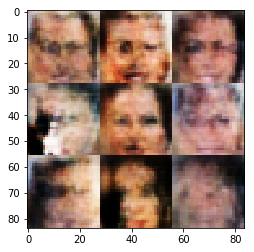

Epoch 1/1... Discriminator Loss: 0.7504... Generator Loss: 1.5319
Epoch 1/1... Discriminator Loss: 0.7487... Generator Loss: 1.6010
Epoch 1/1... Discriminator Loss: 0.9276... Generator Loss: 1.1677
Epoch 1/1... Discriminator Loss: 0.8245... Generator Loss: 1.5015
Epoch 1/1... Discriminator Loss: 0.7196... Generator Loss: 1.7025
Epoch 1/1... Discriminator Loss: 0.9104... Generator Loss: 1.3532
Epoch 1/1... Discriminator Loss: 1.0379... Generator Loss: 1.4225
Epoch 1/1... Discriminator Loss: 0.7977... Generator Loss: 1.6682
Epoch 1/1... Discriminator Loss: 0.8541... Generator Loss: 1.4297
Epoch 1/1... Discriminator Loss: 0.6714... Generator Loss: 1.8403


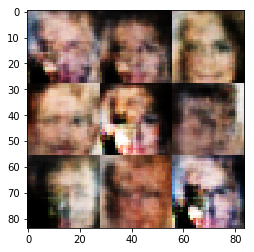

Epoch 1/1... Discriminator Loss: 0.6937... Generator Loss: 1.7984
Epoch 1/1... Discriminator Loss: 0.5762... Generator Loss: 3.4370
Epoch 1/1... Discriminator Loss: 0.6855... Generator Loss: 3.2177
Epoch 1/1... Discriminator Loss: 0.8636... Generator Loss: 1.5303
Epoch 1/1... Discriminator Loss: 0.5190... Generator Loss: 3.6467
Epoch 1/1... Discriminator Loss: 0.7995... Generator Loss: 1.7579
Epoch 1/1... Discriminator Loss: 0.9322... Generator Loss: 1.1186
Epoch 1/1... Discriminator Loss: 0.5485... Generator Loss: 2.8591
Epoch 1/1... Discriminator Loss: 0.6928... Generator Loss: 2.1146
Epoch 1/1... Discriminator Loss: 0.8656... Generator Loss: 1.5600


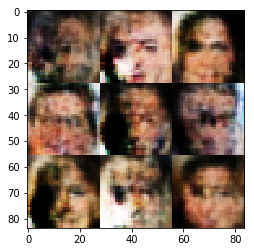

Epoch 1/1... Discriminator Loss: 0.9493... Generator Loss: 1.2064
Epoch 1/1... Discriminator Loss: 0.8084... Generator Loss: 1.4090
Epoch 1/1... Discriminator Loss: 0.9676... Generator Loss: 1.0791
Epoch 1/1... Discriminator Loss: 1.0236... Generator Loss: 1.6123
Epoch 1/1... Discriminator Loss: 0.7302... Generator Loss: 1.8437
Epoch 1/1... Discriminator Loss: 0.8320... Generator Loss: 1.3481
Epoch 1/1... Discriminator Loss: 0.9862... Generator Loss: 1.1751
Epoch 1/1... Discriminator Loss: 0.9430... Generator Loss: 1.2596
Epoch 1/1... Discriminator Loss: 0.7690... Generator Loss: 1.5963
Epoch 1/1... Discriminator Loss: 0.6443... Generator Loss: 2.2147


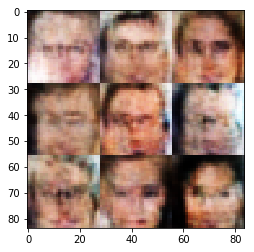

Epoch 1/1... Discriminator Loss: 2.2134... Generator Loss: 2.3978
Epoch 1/1... Discriminator Loss: 0.8956... Generator Loss: 1.4437
Epoch 1/1... Discriminator Loss: 0.8696... Generator Loss: 1.6230
Epoch 1/1... Discriminator Loss: 0.8362... Generator Loss: 1.4874
Epoch 1/1... Discriminator Loss: 0.8181... Generator Loss: 1.7875
Epoch 1/1... Discriminator Loss: 0.9977... Generator Loss: 1.1684
Epoch 1/1... Discriminator Loss: 0.9725... Generator Loss: 1.2128
Epoch 1/1... Discriminator Loss: 0.9529... Generator Loss: 1.1496
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 1.2146
Epoch 1/1... Discriminator Loss: 1.0161... Generator Loss: 1.3305


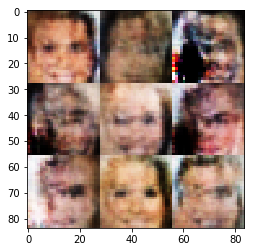

Epoch 1/1... Discriminator Loss: 0.6427... Generator Loss: 2.8766
Epoch 1/1... Discriminator Loss: 0.9860... Generator Loss: 1.1726
Epoch 1/1... Discriminator Loss: 0.8728... Generator Loss: 1.5619
Epoch 1/1... Discriminator Loss: 0.8454... Generator Loss: 1.9313
Epoch 1/1... Discriminator Loss: 0.5844... Generator Loss: 2.6858
Epoch 1/1... Discriminator Loss: 0.8815... Generator Loss: 1.4342
Epoch 1/1... Discriminator Loss: 0.8409... Generator Loss: 1.5725
Epoch 1/1... Discriminator Loss: 0.8277... Generator Loss: 1.8103
Epoch 1/1... Discriminator Loss: 0.9238... Generator Loss: 1.2767
Epoch 1/1... Discriminator Loss: 1.0686... Generator Loss: 1.1607


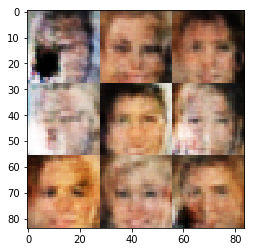

Epoch 1/1... Discriminator Loss: 0.8780... Generator Loss: 1.2501
Epoch 1/1... Discriminator Loss: 0.8889... Generator Loss: 1.3709
Epoch 1/1... Discriminator Loss: 1.0122... Generator Loss: 1.1717
Epoch 1/1... Discriminator Loss: 0.9657... Generator Loss: 1.2176
Epoch 1/1... Discriminator Loss: 0.9246... Generator Loss: 1.5065
Epoch 1/1... Discriminator Loss: 0.8092... Generator Loss: 1.8433
Epoch 1/1... Discriminator Loss: 0.9192... Generator Loss: 1.0764
Epoch 1/1... Discriminator Loss: 0.9282... Generator Loss: 1.3949
Epoch 1/1... Discriminator Loss: 1.0507... Generator Loss: 1.3029
Epoch 1/1... Discriminator Loss: 0.8538... Generator Loss: 1.5832


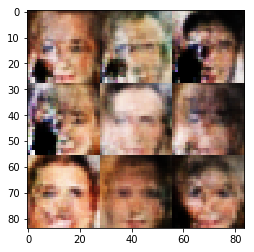

Epoch 1/1... Discriminator Loss: 0.9467... Generator Loss: 1.1084
Epoch 1/1... Discriminator Loss: 1.0467... Generator Loss: 1.1834
Epoch 1/1... Discriminator Loss: 0.9617... Generator Loss: 1.1044
Epoch 1/1... Discriminator Loss: 0.9886... Generator Loss: 1.0318
Epoch 1/1... Discriminator Loss: 0.8187... Generator Loss: 1.5563
Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 1.3022
Epoch 1/1... Discriminator Loss: 0.7020... Generator Loss: 1.9692
Epoch 1/1... Discriminator Loss: 0.6786... Generator Loss: 2.0802
Epoch 1/1... Discriminator Loss: 0.7803... Generator Loss: 1.8759
Epoch 1/1... Discriminator Loss: 0.8668... Generator Loss: 1.7792


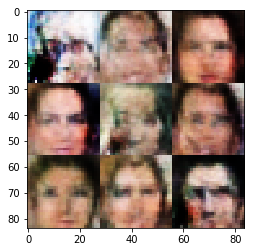

Epoch 1/1... Discriminator Loss: 0.8933... Generator Loss: 1.1375
Epoch 1/1... Discriminator Loss: 0.9123... Generator Loss: 1.1813
Epoch 1/1... Discriminator Loss: 0.9598... Generator Loss: 1.2938
Epoch 1/1... Discriminator Loss: 0.9570... Generator Loss: 1.2159
Epoch 1/1... Discriminator Loss: 0.8461... Generator Loss: 1.3761
Epoch 1/1... Discriminator Loss: 0.5673... Generator Loss: 3.1903
Epoch 1/1... Discriminator Loss: 0.7379... Generator Loss: 1.9553
Epoch 1/1... Discriminator Loss: 0.7453... Generator Loss: 2.2791
Epoch 1/1... Discriminator Loss: 0.9502... Generator Loss: 1.3209
Epoch 1/1... Discriminator Loss: 0.9192... Generator Loss: 1.5793


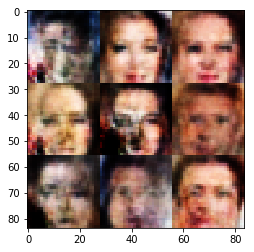

Epoch 1/1... Discriminator Loss: 0.9451... Generator Loss: 1.1051
Epoch 1/1... Discriminator Loss: 0.9711... Generator Loss: 1.2159
Epoch 1/1... Discriminator Loss: 1.0074... Generator Loss: 1.2023
Epoch 1/1... Discriminator Loss: 0.9444... Generator Loss: 1.4039
Epoch 1/1... Discriminator Loss: 1.5164... Generator Loss: 1.3381
Epoch 1/1... Discriminator Loss: 0.9107... Generator Loss: 1.4674
Epoch 1/1... Discriminator Loss: 0.9271... Generator Loss: 1.3020
Epoch 1/1... Discriminator Loss: 0.9701... Generator Loss: 1.1920
Epoch 1/1... Discriminator Loss: 1.0207... Generator Loss: 1.0607
Epoch 1/1... Discriminator Loss: 0.8253... Generator Loss: 1.5721


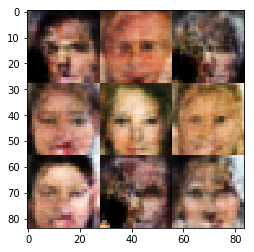

Epoch 1/1... Discriminator Loss: 0.9105... Generator Loss: 1.5553
Epoch 1/1... Discriminator Loss: 0.9230... Generator Loss: 1.2570
Epoch 1/1... Discriminator Loss: 0.9193... Generator Loss: 1.2217
Epoch 1/1... Discriminator Loss: 1.1704... Generator Loss: 1.4706
Epoch 1/1... Discriminator Loss: 1.0080... Generator Loss: 1.1813
Epoch 1/1... Discriminator Loss: 1.0344... Generator Loss: 1.0556
Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 1.1677
Epoch 1/1... Discriminator Loss: 0.9212... Generator Loss: 1.4491
Epoch 1/1... Discriminator Loss: 1.0223... Generator Loss: 1.3385
Epoch 1/1... Discriminator Loss: 0.6975... Generator Loss: 2.5463


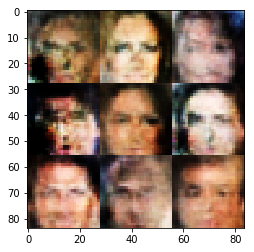

Epoch 1/1... Discriminator Loss: 1.0730... Generator Loss: 1.1166
Epoch 1/1... Discriminator Loss: 1.0405... Generator Loss: 0.9745
Epoch 1/1... Discriminator Loss: 0.9946... Generator Loss: 1.1213
Epoch 1/1... Discriminator Loss: 0.9872... Generator Loss: 1.0726
Epoch 1/1... Discriminator Loss: 1.1073... Generator Loss: 1.2278
Epoch 1/1... Discriminator Loss: 0.8494... Generator Loss: 1.4603
Epoch 1/1... Discriminator Loss: 1.0358... Generator Loss: 1.2801
Epoch 1/1... Discriminator Loss: 0.9367... Generator Loss: 1.2376
Epoch 1/1... Discriminator Loss: 0.8576... Generator Loss: 1.5024
Epoch 1/1... Discriminator Loss: 0.7290... Generator Loss: 1.8035


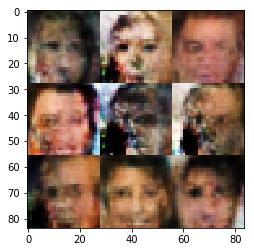

Epoch 1/1... Discriminator Loss: 0.9362... Generator Loss: 1.2330
Epoch 1/1... Discriminator Loss: 0.8901... Generator Loss: 1.1794
Epoch 1/1... Discriminator Loss: 0.6867... Generator Loss: 2.0425
Epoch 1/1... Discriminator Loss: 0.9046... Generator Loss: 1.4347
Epoch 1/1... Discriminator Loss: 0.9462... Generator Loss: 1.2517
Epoch 1/1... Discriminator Loss: 0.8986... Generator Loss: 1.4473
Epoch 1/1... Discriminator Loss: 0.8940... Generator Loss: 1.5324
Epoch 1/1... Discriminator Loss: 0.9288... Generator Loss: 1.2821
Epoch 1/1... Discriminator Loss: 0.9954... Generator Loss: 1.3568
Epoch 1/1... Discriminator Loss: 0.6223... Generator Loss: 2.6952


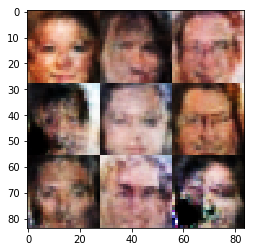

Epoch 1/1... Discriminator Loss: 0.7738... Generator Loss: 1.6753
Epoch 1/1... Discriminator Loss: 0.7863... Generator Loss: 2.3533
Epoch 1/1... Discriminator Loss: 0.9478... Generator Loss: 1.2896
Epoch 1/1... Discriminator Loss: 0.9343... Generator Loss: 1.2678
Epoch 1/1... Discriminator Loss: 0.8402... Generator Loss: 1.4848
Epoch 1/1... Discriminator Loss: 1.0457... Generator Loss: 1.2117
Epoch 1/1... Discriminator Loss: 0.9555... Generator Loss: 0.9878
Epoch 1/1... Discriminator Loss: 1.0956... Generator Loss: 1.2498
Epoch 1/1... Discriminator Loss: 0.7007... Generator Loss: 2.4922
Epoch 1/1... Discriminator Loss: 0.9951... Generator Loss: 1.2159


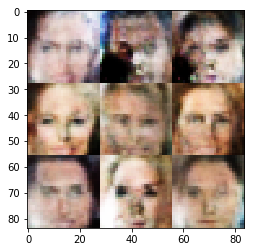

Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 1.2651
Epoch 1/1... Discriminator Loss: 0.8081... Generator Loss: 1.6502
Epoch 1/1... Discriminator Loss: 1.0433... Generator Loss: 1.0717
Epoch 1/1... Discriminator Loss: 1.0402... Generator Loss: 1.0762
Epoch 1/1... Discriminator Loss: 0.9757... Generator Loss: 1.3135
Epoch 1/1... Discriminator Loss: 0.9917... Generator Loss: 1.2311
Epoch 1/1... Discriminator Loss: 0.9217... Generator Loss: 1.3615
Epoch 1/1... Discriminator Loss: 0.8196... Generator Loss: 1.4781
Epoch 1/1... Discriminator Loss: 0.9428... Generator Loss: 1.2432
Epoch 1/1... Discriminator Loss: 0.8774... Generator Loss: 1.6303


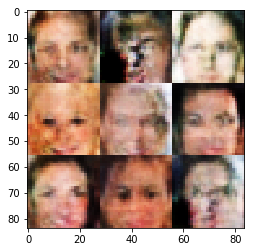

Epoch 1/1... Discriminator Loss: 0.9734... Generator Loss: 1.1347
Epoch 1/1... Discriminator Loss: 0.8924... Generator Loss: 1.5006
Epoch 1/1... Discriminator Loss: 0.9553... Generator Loss: 1.2127
Epoch 1/1... Discriminator Loss: 0.8800... Generator Loss: 1.4632
Epoch 1/1... Discriminator Loss: 1.0428... Generator Loss: 1.0676
Epoch 1/1... Discriminator Loss: 0.8975... Generator Loss: 1.5040
Epoch 1/1... Discriminator Loss: 1.0051... Generator Loss: 1.2800
Epoch 1/1... Discriminator Loss: 1.0394... Generator Loss: 1.4141
Epoch 1/1... Discriminator Loss: 0.7939... Generator Loss: 1.4496
Epoch 1/1... Discriminator Loss: 0.9771... Generator Loss: 1.3397


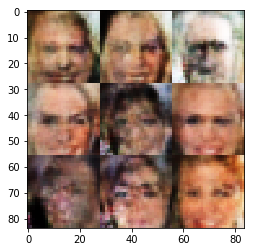

Epoch 1/1... Discriminator Loss: 0.9403... Generator Loss: 1.2946
Epoch 1/1... Discriminator Loss: 1.0873... Generator Loss: 1.3096
Epoch 1/1... Discriminator Loss: 0.9177... Generator Loss: 1.3400
Epoch 1/1... Discriminator Loss: 1.0167... Generator Loss: 1.3716
Epoch 1/1... Discriminator Loss: 0.9215... Generator Loss: 1.2438
Epoch 1/1... Discriminator Loss: 1.0295... Generator Loss: 1.1054
Epoch 1/1... Discriminator Loss: 0.7795... Generator Loss: 1.6716
Epoch 1/1... Discriminator Loss: 1.9039... Generator Loss: 0.5814
Epoch 1/1... Discriminator Loss: 1.5766... Generator Loss: 1.8810
Epoch 1/1... Discriminator Loss: 0.9675... Generator Loss: 1.1471


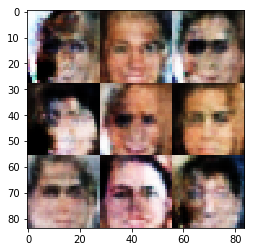

Epoch 1/1... Discriminator Loss: 0.9141... Generator Loss: 1.4061
Epoch 1/1... Discriminator Loss: 0.7663... Generator Loss: 1.9190
Epoch 1/1... Discriminator Loss: 1.0559... Generator Loss: 1.3205
Epoch 1/1... Discriminator Loss: 1.0157... Generator Loss: 1.1451
Epoch 1/1... Discriminator Loss: 0.8809... Generator Loss: 1.4067
Epoch 1/1... Discriminator Loss: 0.8636... Generator Loss: 1.5518
Epoch 1/1... Discriminator Loss: 1.1709... Generator Loss: 1.1879
Epoch 1/1... Discriminator Loss: 1.0016... Generator Loss: 1.0960
Epoch 1/1... Discriminator Loss: 1.0959... Generator Loss: 0.9223
Epoch 1/1... Discriminator Loss: 1.0330... Generator Loss: 1.1197


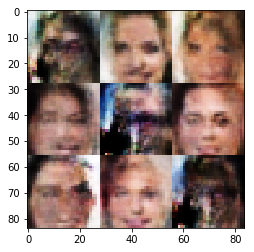

Epoch 1/1... Discriminator Loss: 0.9077... Generator Loss: 1.2203
Epoch 1/1... Discriminator Loss: 1.0549... Generator Loss: 1.0448
Epoch 1/1... Discriminator Loss: 1.0145... Generator Loss: 1.1808
Epoch 1/1... Discriminator Loss: 0.9674... Generator Loss: 1.2549
Epoch 1/1... Discriminator Loss: 0.9193... Generator Loss: 1.1966
Epoch 1/1... Discriminator Loss: 0.9120... Generator Loss: 1.3843
Epoch 1/1... Discriminator Loss: 0.9236... Generator Loss: 1.7374
Epoch 1/1... Discriminator Loss: 0.9509... Generator Loss: 1.2851
Epoch 1/1... Discriminator Loss: 1.0860... Generator Loss: 0.9556
Epoch 1/1... Discriminator Loss: 0.9882... Generator Loss: 1.1721


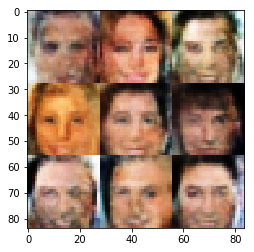

Epoch 1/1... Discriminator Loss: 0.9336... Generator Loss: 1.3542
Epoch 1/1... Discriminator Loss: 1.0043... Generator Loss: 1.0403
Epoch 1/1... Discriminator Loss: 1.0070... Generator Loss: 1.1315
Epoch 1/1... Discriminator Loss: 0.9325... Generator Loss: 1.3577
Epoch 1/1... Discriminator Loss: 0.9242... Generator Loss: 1.2408
Epoch 1/1... Discriminator Loss: 1.0945... Generator Loss: 1.4111
Epoch 1/1... Discriminator Loss: 0.8395... Generator Loss: 1.5040
Epoch 1/1... Discriminator Loss: 0.7939... Generator Loss: 2.1712
Epoch 1/1... Discriminator Loss: 0.8828... Generator Loss: 1.3962
Epoch 1/1... Discriminator Loss: 1.0140... Generator Loss: 1.2357


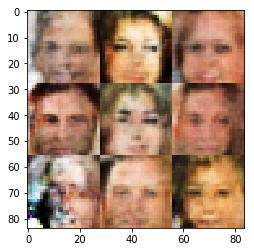

Epoch 1/1... Discriminator Loss: 0.7120... Generator Loss: 2.3549
Epoch 1/1... Discriminator Loss: 1.1345... Generator Loss: 1.1952
Epoch 1/1... Discriminator Loss: 0.8672... Generator Loss: 1.5879
Epoch 1/1... Discriminator Loss: 0.6409... Generator Loss: 2.9370
Epoch 1/1... Discriminator Loss: 0.8687... Generator Loss: 1.4024
Epoch 1/1... Discriminator Loss: 1.0000... Generator Loss: 1.3180


In [53]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.